In [2]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast 

# Load Datasets
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup (Datetime & 'job_skills' to list type)
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
# Converts 'job_skills' column to list type - Allows for .explode()
df['job_skills'] = (df['job_skills']
                    .apply(lambda skill_list: ast.literal_eval(skill_list) if pd.notna(skill_list) else skill_list)) 

# Filter for 'Data Analyst' jobs and jobs from the USA
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

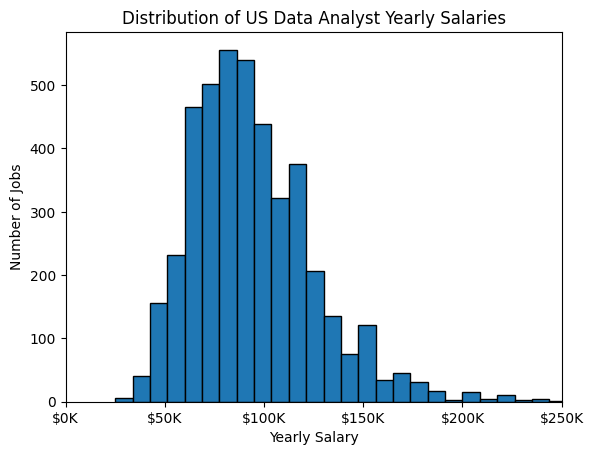

In [10]:
df_DA_US['salary_year_avg'].plot(kind='hist', bins = 40, edgecolor = 'black')
plt.xlim(0,250000)

# Formatting x axis labels
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

# Titles
plt.title('Distribution of US Data Analyst Yearly Salaries')
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')
plt.show()